# Session 12

## Cloning the repo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/ERA-v1

/content/drive/MyDrive/Github/ERA-v1


In [ ]:
! git config --global user.email "me18b059@smail.iitm.ac.in"
! git config --global  pull.ff true
! git stash push --include-untracked
! git stash drop
! git pull

In [4]:
%cd S12/

/content/drive/MyDrive/Github/ERA-v1/S12


# CIFAR-10 dataset classification

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

# Importing basic dependencies

In [ ]:
!pip install torchmetrics
!pip install torch_lr_finder
!pip install pytorch_lightning

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
# del model
import torch
from Utilities.model import Net
import torch.nn.functional as F
from torchsummary import summary
from Utilities import config

torch.manual_seed(config.SEED)

# Model Initialization & Summary

In [12]:
criterion = F.cross_entropy

model = Net(
    num_classes=config.NUM_CLASSES,
    dropout_percentage=config.DROPOUT_PERCENTAGE,
    norm=config.LAYER_NORM,
    criterion=criterion,
    learning_rate=config.LEARNING_RATE,
    weight_decay=config.WEIGHT_DECAY)

summary(model.to(config.ACCELERATOR), input_size=config.INPUT_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          73,856
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
              ReLU-8          [-1, 128, 16, 16]               0
           Dropout-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]         147,584
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
          Dropout-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

# Dataset & Dataloaders

In [13]:
from Utilities.transforms import train_transforms, test_transforms

In [14]:
from Utilities.dataset import CIFAR10DataModule

kwargs = {'batch_size': config.BATCH_SIZE,
          'shuffle': config.SHUFFLE,
          'num_workers': config.NUM_WORKERS,
          'pin_memory': config.PIN_MEMORY}
data_module = CIFAR10DataModule(train_transforms=train_transforms, val_transforms=test_transforms, **kwargs)

In [15]:
# Call the setup() method before train_dataloader()
data_module.prepare_data()
data_module.setup(stage=None)

# Now you can call train_dataloader()
train_loader = data_module.train_dataloader()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Exploration

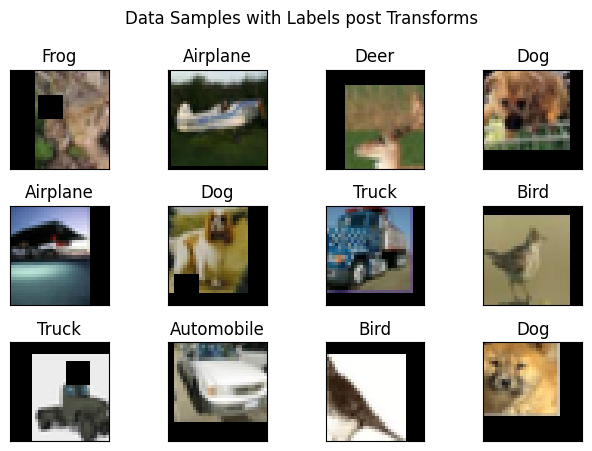

In [12]:
from Utilities.visualize import plot_data_samples, plot_class_label_counts

# plot_class_label_counts(train_loader, classes=config.CLASSES)
plot_data_samples(train_loader, classes=config.CLASSES)

# Training

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/50 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.56E-03


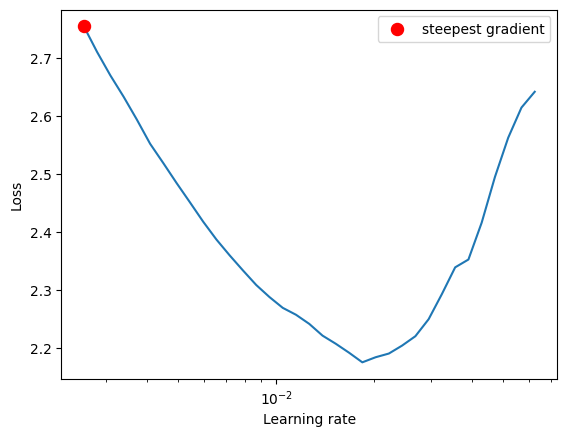

Sanity Checking: 0it [00:00, ?it/s]


Epoch: 0, Val Loss: 2.303018569946289, Val Accuracy: 0.0927734375


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Epoch: 0, Val Loss: 1.477613925933838, Val Accuracy: 0.46369999647140503

Epoch: 0, Train Loss: 1.8622440099716187, Train Accuracy: 0.32736000418663025


Validation: 0it [00:00, ?it/s]


Epoch: 1, Val Loss: 1.0305286645889282, Val Accuracy: 0.6324999928474426

Epoch: 1, Train Loss: 1.2540448904037476, Train Accuracy: 0.5509399771690369


Validation: 0it [00:00, ?it/s]


Epoch: 2, Val Loss: 0.905449390411377, Val Accuracy: 0.6851999759674072

Epoch: 2, Train Loss: 0.9339127540588379, Train Accuracy: 0.6700199842453003


Validation: 0it [00:00, ?it/s]


Epoch: 3, Val Loss: 0.799048900604248, Val Accuracy: 0.7333999872207642

Epoch: 3, Train Loss: 0.7537699341773987, Train Accuracy: 0.7354999780654907


Validation: 0it [00:00, ?it/s]


Epoch: 4, Val Loss: 0.6794794201850891, Val Accuracy: 0.7656999826431274

Epoch: 4, Train Loss: 0.6541508436203003, Train Accuracy: 0.7729399800300598


Validation: 0it [00:00, ?it/s]


Epoch: 5, Val Loss: 0.6306113004684448, Val Accuracy: 0.7867000102996826

Epoch: 5, Train Loss: 0.5723051428794861, Train Accuracy: 0.8019199967384338


Validation: 0it [00:00, ?it/s]


Epoch: 6, Val Loss: 0.5900896191596985, Val Accuracy: 0.7961000204086304

Epoch: 6, Train Loss: 0.5007141828536987, Train Accuracy: 0.8266400098800659


Validation: 0it [00:00, ?it/s]


Epoch: 7, Val Loss: 0.471587210893631, Val Accuracy: 0.8413000106811523

Epoch: 7, Train Loss: 0.4469413161277771, Train Accuracy: 0.8455600142478943


Validation: 0it [00:00, ?it/s]


Epoch: 8, Val Loss: 0.5326340198516846, Val Accuracy: 0.8228999972343445

Epoch: 8, Train Loss: 0.39900901913642883, Train Accuracy: 0.8606799840927124


Validation: 0it [00:00, ?it/s]


Epoch: 9, Val Loss: 0.40668997168540955, Val Accuracy: 0.8654000163078308

Epoch: 9, Train Loss: 0.3671680986881256, Train Accuracy: 0.8739399909973145


Validation: 0it [00:00, ?it/s]


Epoch: 10, Val Loss: 0.3456963002681732, Val Accuracy: 0.8837000131607056

Epoch: 10, Train Loss: 0.3388667702674866, Train Accuracy: 0.8831999897956848


Validation: 0it [00:00, ?it/s]


Epoch: 11, Val Loss: 0.35601386427879333, Val Accuracy: 0.8769999742507935

Epoch: 11, Train Loss: 0.30515751242637634, Train Accuracy: 0.89274001121521


Validation: 0it [00:00, ?it/s]


Epoch: 12, Val Loss: 0.31688356399536133, Val Accuracy: 0.8914999961853027

Epoch: 12, Train Loss: 0.28730571269989014, Train Accuracy: 0.8989400267601013


Validation: 0it [00:00, ?it/s]


Epoch: 13, Val Loss: 0.3391858637332916, Val Accuracy: 0.8871999979019165

Epoch: 13, Train Loss: 0.26656946539878845, Train Accuracy: 0.9071800112724304


Validation: 0it [00:00, ?it/s]


Epoch: 14, Val Loss: 0.3330417573451996, Val Accuracy: 0.8906999826431274

Epoch: 14, Train Loss: 0.25152936577796936, Train Accuracy: 0.9127799868583679


Validation: 0it [00:00, ?it/s]


Epoch: 15, Val Loss: 0.2939375936985016, Val Accuracy: 0.9016000032424927

Epoch: 15, Train Loss: 0.22532588243484497, Train Accuracy: 0.9213200211524963


Validation: 0it [00:00, ?it/s]


Epoch: 16, Val Loss: 0.29781222343444824, Val Accuracy: 0.9031000137329102

Epoch: 16, Train Loss: 0.2067444771528244, Train Accuracy: 0.9279400110244751


Validation: 0it [00:00, ?it/s]


Epoch: 17, Val Loss: 0.3049575090408325, Val Accuracy: 0.9053999781608582

Epoch: 17, Train Loss: 0.19144289195537567, Train Accuracy: 0.9330800175666809


Validation: 0it [00:00, ?it/s]


Epoch: 18, Val Loss: 0.2997421622276306, Val Accuracy: 0.9049000144004822

Epoch: 18, Train Loss: 0.17048843204975128, Train Accuracy: 0.9408599734306335


Validation: 0it [00:00, ?it/s]


Epoch: 19, Val Loss: 0.2569156587123871, Val Accuracy: 0.9153000116348267

Epoch: 19, Train Loss: 0.1569124311208725, Train Accuracy: 0.9463599920272827


Validation: 0it [00:00, ?it/s]


Epoch: 20, Val Loss: 0.25585222244262695, Val Accuracy: 0.9172000288963318

Epoch: 20, Train Loss: 0.13740618526935577, Train Accuracy: 0.9524999856948853


Validation: 0it [00:00, ?it/s]


Epoch: 21, Val Loss: 0.2459949254989624, Val Accuracy: 0.9215999841690063

Epoch: 21, Train Loss: 0.12286654114723206, Train Accuracy: 0.9581800103187561


Validation: 0it [00:00, ?it/s]


Epoch: 22, Val Loss: 0.24200274050235748, Val Accuracy: 0.923799991607666

Epoch: 22, Train Loss: 0.11110514402389526, Train Accuracy: 0.9627400040626526


Validation: 0it [00:00, ?it/s]


Epoch: 23, Val Loss: 0.23540237545967102, Val Accuracy: 0.925000011920929

Epoch: 23, Train Loss: 0.10367754846811295, Train Accuracy: 0.964739978313446


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=24` reached.


Training, validation, and testing completed!


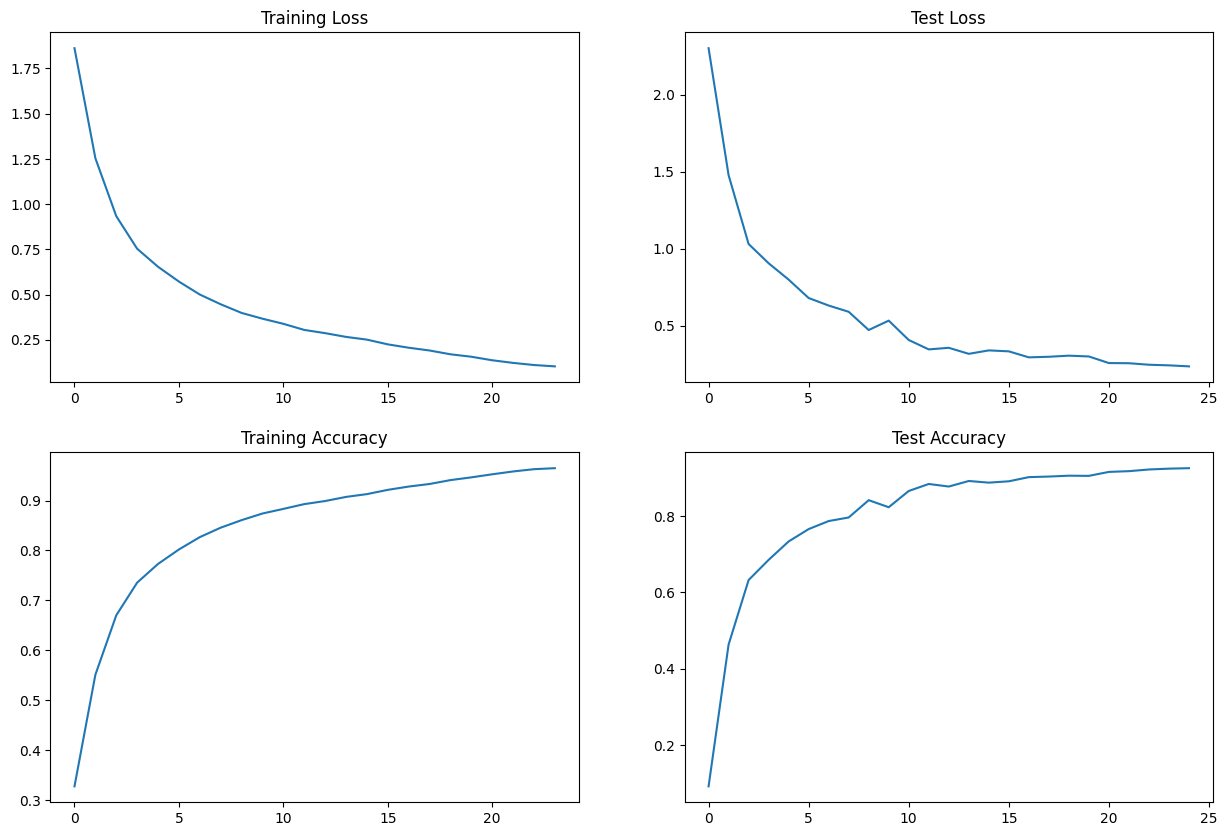

In [16]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelSummary
from Utilities.callbacks import TrainingEndCallback, PrintLearningMetricsCallback

trainer = pl.Trainer(accelerator=config.ACCELERATOR,
                     callbacks=[ModelSummary(max_depth=0), TrainingEndCallback(), PrintLearningMetricsCallback()],
                     min_epochs=config.NUM_EPOCHS, max_epochs=config.NUM_EPOCHS)
trainer.fit(model, datamodule=data_module)

# Testing & Evaluation

Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]


Epoch: 24, Test Loss: 0.23540237545967102, Test Accuracy: 0.925000011920929


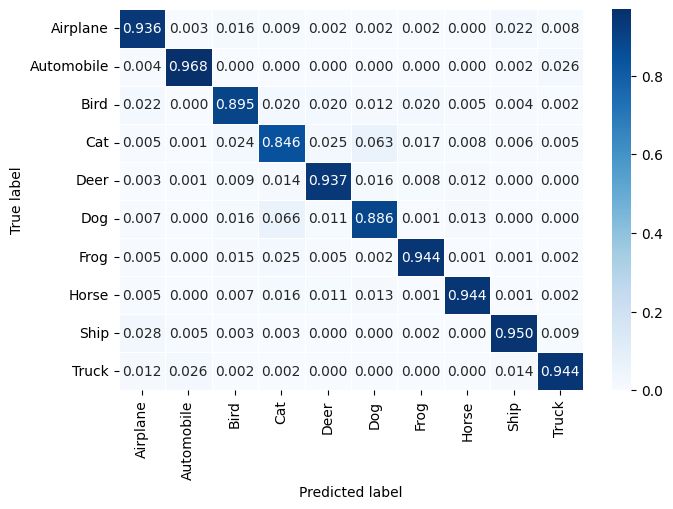

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_acc_epoch       │     0.925000011920929     │
│      test_loss_epoch      │    0.23540237545967102    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss_epoch': 0.23540237545967102, 'test_acc_epoch': 0.925000011920929}]

In [17]:
trainer.test(model=model, datamodule=data_module, verbose=True)

Total Incorrect Predictions 750


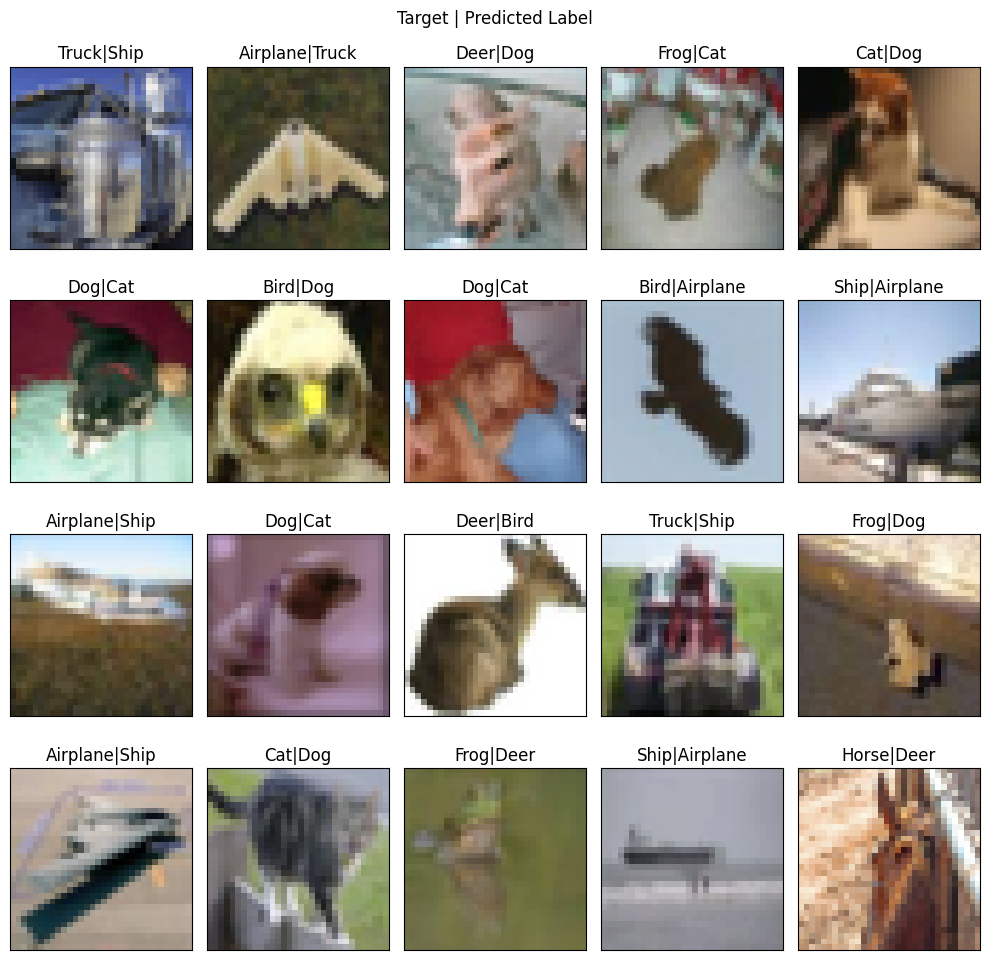

In [18]:
model.plot_incorrect_predictions_helper(num_imgs=20)

# Saving the model

In [19]:
torch.save(model.state_dict(), config.MODEL_SAVE_PATH)

In [21]:
torch.save(model.pred_store, "Store/pred_store.pth")

### Git Push

In [22]:
! git remote set-url origin git@github.com:Madhur-1/ERA-v1.git
! git add .
# ! git commit -m "S12 commit 92.31%"
! git push

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
